In [1]:
#ライブラリの読み込み
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#訓練データ、テストデータの読み込み
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")
data=pd.concat([train,test],ignore_index=True)

In [3]:
#データの表示
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
#欠損値の確認
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
#"Name"を敬称毎(Master,Mr,Miss,Mrs)に分類する関数name_classifier()の作成
def name_classifier(names):
    df=pd.DataFrame(columns={"honofics"})
    
    for name in names:
        if "Master" in name:
            df=df.append({"honofics":"master"},ignore_index=True)
        elif "Mrs" in name:
            df=df.append({"honofics":"mrs"},ignore_index=True)
        elif "Mr" in name:
            df=df.append({"honofics":"mr"},ignore_index=True)
        elif "Miss" in name:
            df=df.append({"honofics":"miss"},ignore_index=True)
        else:
            df=df.append({"honofics":"other"},ignore_index=True)
    return df

In [6]:
#新たな特徴量"honofics"の作成
#"honofics":"Name"を関数name_classifier()を用いて分類した敬称
honofics=name_classifier(data["Name"])
data=pd.concat([data,honofics],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honofics
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr


<AxesSubplot:xlabel='honofics', ylabel='count'>

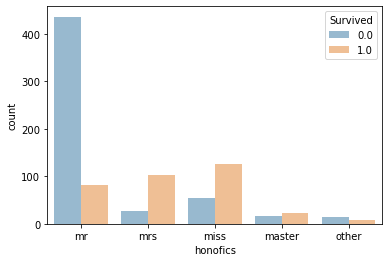

In [7]:
#"honofics"と"Survived"の関係の描画
sns.countplot(data["honofics"],hue=data["Survived"],alpha=0.5)

In [8]:
#"honofics"毎の平均年齢の算出
master_age=data.loc[data["honofics"]=="master","Age"].mean()
mr_age=data.loc[data["honofics"]=="mr","Age"].mean()
miss_age=data.loc[data["honofics"]=="miss","Age"].mean()
mrs_age=data.loc[data["honofics"]=="mrs","Age"].mean()

In [9]:
#"Age"が欠損しているデータに関して、敬称毎の平均年齢で補完する
data.loc[data["honofics"]=="master","Age"]=data.loc[data["honofics"]=="master","Age"].fillna(master_age)
data.loc[data["honofics"]=="mr","Age"]=data.loc[data["honofics"]=="mr","Age"].fillna(mr_age)
data.loc[data["honofics"]=="miss","Age"]=data.loc[data["honofics"]=="miss","Age"].fillna(miss_age)
data.loc[data["honofics"]=="mrs","Age"]=data.loc[data["honofics"]=="mrs","Age"].fillna(mrs_age)

In [10]:
#"honofics"が定まっていないデータの抽出
others=data.loc[data["honofics"]=="other",["Age","Sex","honofics"]]
others.head()

,Age,Sex,honofics
30,40.0,male,other
149,42.0,male,other
150,51.0,male,other
245,44.0,male,other
249,54.0,male,other


In [11]:
#"honofics"が定まっていないデータに関して、年齢と性別から"honofics"を仮定する

#masterとmr,missとmrsを分ける境界年齢
m_border=(master_age+mr_age)/2
f_border=(miss_age+mrs_age)/2

others.loc[(others["Age"]<m_border)&(others["Sex"]=="male"),"honofics"]="master"
others.loc[(others["Age"]>=m_border)&(others["Sex"]=="male"),"honofics"]="mr"
others.loc[(others["Age"]<f_border)&(others["Sex"]=="female"),"honofics"]="miss"
others.loc[(others["Age"]>=f_border)&(others["Sex"]=="female"),"honofics"]="mrs"
            
#敬称を"master","mr","miss","mrs"のどれかに当てはめる
data.loc[data["honofics"]=="other","honofics"]=others["honofics"]

In [12]:
#年齢と性別に欠損値が含まれており、敬称を仮定することが出来なかったデータに関して、男性は"mr",女性は"miss"と仮定して補完する
data.loc[data["honofics"]=="other","Age"]=[mr_age,miss_age]
data.loc[data["honofics"]=="other","honofics"]=["mr","miss"]

<AxesSubplot:xlabel='honofics', ylabel='count'>

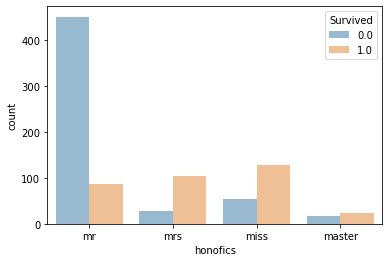

In [13]:
#"honofics"と"Survived"の関係図の描画
sns.countplot(data["honofics"],hue=data["Survived"],alpha=0.5)

In [14]:
#"Fare"が欠損値であるデータ
data.loc[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honofics
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,mr


In [15]:
#"Fare"の欠損値は1つしかないので、平均値で補完
data["Fare"].fillna(data["Fare"].mean(),inplace=True)

In [16]:
#"Embarked"が欠損値であるデータ
data.loc[data["Embarked"].isnull(),["Survived","Pclass","Embarked"]]

,Survived,Pclass,Embarked
61,1.0,1,NaN
829,1.0,1,NaN


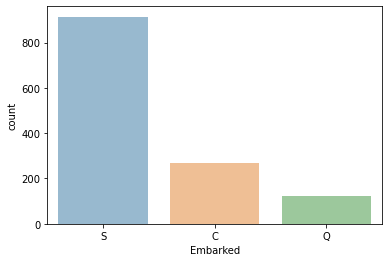

In [17]:
#"Embarked"毎の人数の描画
sns.countplot(data["Embarked"],alpha=0.5)

#"Embarked"の欠損値を人数の最も多い"S"で補完する
data["Embarked"].fillna("S",inplace=True)

In [18]:
#新たな特徴量"hasCabin"の作成
#"hasCabin":"Cabin"に関する情報が有るデータは"1","Cabin"に関する情報が無いデータは"0"とする
data["hasCabin"]=1
data.loc[data["Cabin"].isnull(),"hasCabin"]=0

<AxesSubplot:xlabel='hasCabin', ylabel='count'>

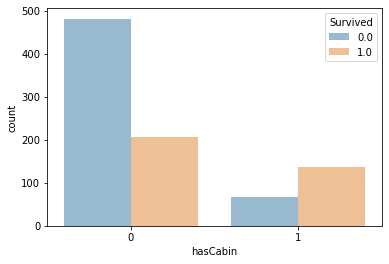

In [19]:
#"hasCabin"と"Survived"の関係図の描画
sns.countplot(data["hasCabin"],hue=data["Survived"],alpha=0.5)

<AxesSubplot:xlabel='SameTicketNumber', ylabel='count'>

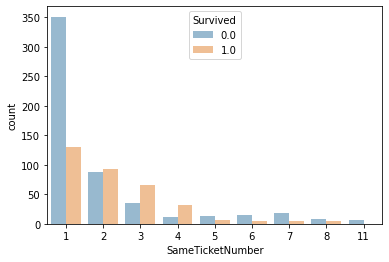

In [20]:
#新たな特徴量"SameTicketNumber"の作成
#"SameTicketNumber":Ticket"の同一チケット枚数
TicketCount=dict(data["Ticket"].value_counts())
data["SameTicketNumber"]=data["Ticket"].map(TicketCount)

#"SameTicketScale"と"Survived"の関係図の描画
sns.countplot(data["SameTicketNumber"],hue=data["Survived"],alpha=0.5)

In [21]:
#"SameTicketNumber"と"Survived"の関係が線形変化では無いので、スケール処理を行う
#新たな特徴量"SameTicketScale"の作成
#"SameTicketScale":1枚/2-4枚/5枚-でグループ分け
data.loc[data["SameTicketNumber"]==1,"SameTicketScale"]="one"
data.loc[(2<=data["SameTicketNumber"])&(data["SameTicketNumber"]<=4),"SameTicketScale"]="medium"
data.loc[5<=data["SameTicketNumber"],"SameTicketScale"]="large"

<AxesSubplot:xlabel='SameTicketScale', ylabel='count'>

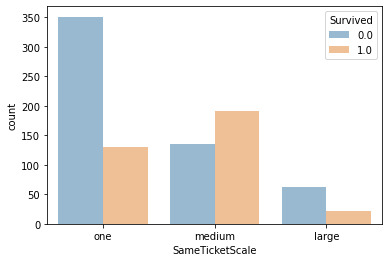

In [22]:
#"SameTicketScale"と"Survived"の関係図の描画
sns.countplot(data["SameTicketScale"],hue=data["Survived"],alpha=0.5)

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

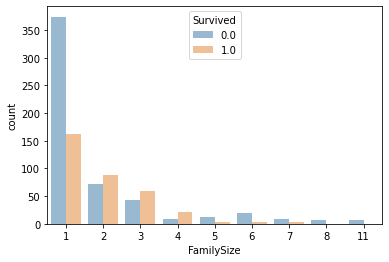

In [23]:
#新たな特徴量"FamilySize"の作成
#"FamilySize":"SibSp"+"Parch"+1
data["FamilySize"]=data["SibSp"]+data["Parch"]+1

#"FamilySize"と"Survived"の関係図の描画
sns.countplot(data["FamilySize"],hue=data["Survived"],alpha=0.5)

In [24]:
#"FamilySize"と"Survived"の関係が線形変化では無いので、スケール処理を行う
#新たな特徴量"FamilyScale"の作成
#"FamilyScale":1人/2-4人/5人-のスケールで分ける
data.loc[data["FamilySize"]==1,"FamilyScale"]="alone"
data.loc[(2<=data["FamilySize"])&(data["FamilySize"]<=4),"FamilyScale"]="medium"
data.loc[5<=data["FamilySize"],"FamilyScale"]="large"

<AxesSubplot:xlabel='FamilyScale', ylabel='count'>

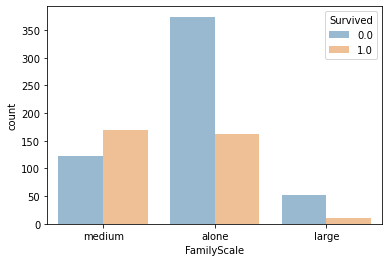

In [25]:
#"FamilyScale"と"Survived"の関係図の描画
sns.countplot(data["FamilyScale"],hue=data["Survived"],alpha=0.5)

In [26]:
#データの表示
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honofics,hasCabin,SameTicketNumber,SameTicketScale,FamilySize,FamilyScale
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr,0,1,one,2,medium
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs,1,2,medium,2,medium
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss,0,1,one,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs,1,2,medium,2,medium
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr,0,1,one,1,alone


In [27]:
#分類に必要な特徴量の指定
use_columns=["Survived","Pclass","Sex","Age","Fare","hasCabin","Embarked","SameTicketScale","FamilyScale"]
data=data[use_columns]

In [28]:
#ダミー変数化
data["Sex"].replace({"male":0,"female":1},inplace=True)
data=pd.get_dummies(data,columns=["Embarked","SameTicketScale","FamilyScale"],drop_first=True)

In [29]:
#データの表示
data.head()

,Survived,Pclass,Sex,Age,Fare,hasCabin,Embarked_Q,Embarked_S,SameTicketScale_medium,SameTicketScale_one,FamilyScale_large,FamilyScale_medium
0,0.0,3,0,22.0,7.2500,0,0,1,0,1,0,1
1,1.0,1,1,38.0,71.2833,1,0,0,1,0,0,1
2,1.0,3,1,26.0,7.9250,0,0,1,0,1,0,0
3,1.0,1,1,35.0,53.1000,1,0,1,1,0,0,1
4,0.0,3,0,35.0,8.0500,0,0,1,0,1,0,0


In [30]:
#訓練データとテストデータに分割
train=data[:len(train)]
test=data[len(train):]

In [31]:
#訓練データを説明変数と目的変数に分ける
X=train.iloc[:, 1:]
y=train.iloc[:, 0]

In [32]:
#ホールドアウト法によるデータ分割
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=0,stratify=y)

In [33]:
#ランダムフォレストによる学習/予測
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth=5,min_samples_leaf=2,n_estimators=150,random_state=0)
forest.fit(X_train, y_train)

#既知データ/未知データに対する分類精度の出力
print("train score:",forest.score(X_train,y_train))
print("test score:",forest.score(X_valid,y_valid))

train score: 0.875748502994012
test score: 0.8430493273542601


In [34]:
#テストデータセットに対する予測
X=test.iloc[:, 1:]
pred=forest.predict(X)

In [35]:
#提出ファイルの作成
sub=pd.read_csv("data/gender_submission.csv")
sub["Survived"]=pred.astype(int)
sub.to_csv("data/my_submission.csv",index=False)